# Exercise: Unsupervised Learning


## Goal of this exercise

After having learned about the different clustering techniques and dimensionality reduction method is is not time to put therory into practice. The exercise comprises the following tasks: 

* implementing the k-means algorithm
* evaluating different clustering techniques
* comparing different dimensionality reduction methods

Required packages

* numpy
* matplotlib
* sklearn
* seaborn
* pandas


You can execute individual code blocks by pressing SHIFT+Enter consecutively.

You can trigger auto completion with TABULATOR

## Import required packages

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Task 1: Simple K-Means Algorithm

The first task is to implement the K-means algorithm in order to automatically find clusters in an unannotated dataset.
For simplicity, we only integrate the K-means algorithm for a 2-cluster problem.

1. Execute the cell below to generate and visualize the blob scatterplot and the initial centroids.
2. The goal of K-means is to iteratively compute new, better fitting centroids that lie in the middle of the dataset clusters.
   To compute new centroid positions, we first need to determine the distance of each data point to both centroids. As a first    step, compute all absolute x,y differences between centroids and datapoints (aka vectors from the centroids to each datapoint).
   Save the results in the variables: diff_vec_A and diff_vec_B.
3. Now we have the raw x,y difference vectors, and can now compute the euclidian distances.
   Use np.linalg.norm(diff_vec_A,axis = 1) to calculate the distances dist_vec_A and dist_vec_B. 
4. With the computed distances, we can now determine which datapoint lies closer to which of the two centroids.
   Compute a vector cl_indices of shape (1000,), that has 0s for datapoints that lie closer to centroid_A and 1s that lie closer    to centroid_B. Hint: One way of doing this is by first conctatening dist_vec_A and dist_vec_B (np.vstack) and then applying    the np.argmin() function. 
5. With cl_indices we can now find the groups of points that in this first iteration will be attributed to cluster A or B.
   You can do this by using: cluster_A = data[cl_indices==0], cluster_B = data[cl_indices==1] 
6. Both clusters can now be used to compute the new updated centroid positions. the new centroid position (x,y) for A:          centroid_A_new is defined by the average of all x-values and y-values of cluster_A. Compute both new centroids:                centroid_B_new and centroid_B_new.
7. Next, track how much the each centroid has moved in this iteration by computing the distance of motion (centroid_dist_A,        centroid_dist_B), using e.g. np.linalg.norm(centroid_A_new-centroid_A)
8. With all neccessary variables computed you can now use the next cell to visualize the cluster assignments and centroid          positions.
9. So far we have just completed the first iteration of the K-means algorithm, but as you can see the clustering is not perfect    yet. Therefore, first copy your code into the function: custom_k means (see cell below). Then create a for loop that repeats    the function 5 times. Be careful that you always give the latest centroids as input to the function.
10. BONUS TASK 1: So far we have used fixed starting centroid positions (centroid_A, centroid_B). Try out how well other           starting positions work.
11. BONUS TASK 2: Try out how well the algorithm works for other scatterplots (try out datasets.make_blobs with other random       states).
12. BONUS TASK 3: Currently the code only works for scatterplots with 2 clusters. Can you modify the code in a way that it         works for an arbitrary number of clusters? 

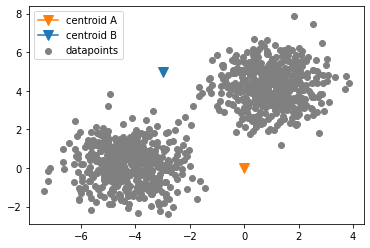

In [2]:
# 1

# generate a simple scatterplot containing
# data[:,0] are x values, data[:,1] are the y values
data,_ = datasets.make_blobs(n_samples=1000, centers=2, n_features=2,random_state=3)


# K-means uses centroids for initialization
# Since we want to find 2 clusters we use 2 centroids 
centroid_A = np.array([0,0])
centroid_B = np.array([-3.0,5.0])

# visualize the datapoints and centroids
plt.figure()
plt.scatter(data[:,0],data[:,1],color = "gray", label = "datapoints")
plt.plot(centroid_A[0],centroid_A[1],color="tab:orange",marker="v", markersize= 10, label = "centroid A")
plt.plot(centroid_B[0],centroid_B[1],color="tab:blue", marker = "v", markersize= 10, label = "centroid B")
plt.legend()

In [3]:
# 2
diff_vec_A  = 
diff_vec_B  = 

# 3
dist_vec_A  = 
dist_vec_B  = 

# 4
dist_vec    = 
cl_indices  = 

# 5
cluster_A   = 
cluster_B   = 

# 6
centroid_A_new  = 
centroid_B_new  = 

# 7
centroid_dist_A = 
centroid_dist_B = 

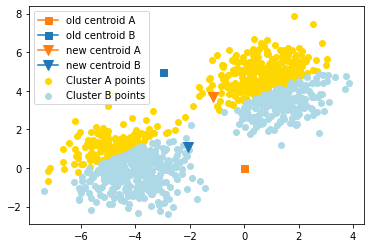

In [4]:
plt.figure()
plt.scatter(cluster_A[:,0],cluster_A[:,1],color = "gold", label = "Cluster A points")
plt.scatter(cluster_B[:,0],cluster_B[:,1],color = "lightblue", label = "Cluster B points")
plt.plot(centroid_A[0],centroid_A[1],color="tab:orange",marker="s", markersize= 7, label = "old centroid A")
plt.plot(centroid_B[0],centroid_B[1],color="tab:blue", marker = "s", markersize= 7, label = "old centroid B")
plt.plot(centroid_A_new[0],centroid_A_new[1],color="tab:orange",marker="v", markersize= 10, label = "new centroid A")
plt.plot(centroid_B_new[0],centroid_B_new[1],color="tab:blue", marker = "v", markersize= 10, label = "new centroid B")
plt.legend()

In [6]:
print("below are the intermediate results for reference. Only the first 5 entries for each variable are printed")
print("\n")
print(f"data: \n{data[0:5,:]}")
print("\n")
print(f"centroid_A: \n{centroid_A}")
print(f"centroid_B: \n{centroid_B}")
print("\n")
print(f"diff_vec_A: \n{diff_vec_A[0:5,:]}")
print(f"diff_vec_B: \n{diff_vec_B[0:5,:]}")
print("\n")
print(f"dist_vec_A: \n{dist_vec_A[0:5]}")
print(f"dist_vec_B: \n{dist_vec_B[0:5]}")
print("\n")
print(f"cl_indices: \n{cl_indices[0:5]}")
print("\n")
print(f"cluster_A: \n{cluster_A[0:5]}")
print(f"cluster_B: \n{cluster_B[0:5]}")
print("\n")
print(f"centroid_A_new: \n{centroid_A_new}")
print(f"centroid_B_new: \n{centroid_B_new}")
print("\n")
print(f"centroid_dist_A: \n{centroid_dist_A}")
print(f"centroid_dist_B: \n{centroid_dist_B}")

below are the intermediate results for reference. Only the first 5 entries for each variable are printed


data: 
[[-3.13905951 -0.52526094]
 [ 1.50330212  5.17319815]
 [ 1.58766126  5.53800785]
 [-0.64322402  4.1822662 ]
 [ 1.14325315  6.35671961]]


centroid_A: 
[0 0]
centroid_B: 
[-3.  5.]


diff_vec_A: 
[[-3.13905951 -0.52526094]
 [ 1.50330212  5.17319815]
 [ 1.58766126  5.53800785]
 [-0.64322402  4.1822662 ]
 [ 1.14325315  6.35671961]]
diff_vec_B: 
[[-0.13905951 -5.52526094]
 [ 4.50330212  0.17319815]
 [ 4.58766126  0.53800785]
 [ 2.35677598 -0.8177338 ]
 [ 4.14325315  1.35671961]]


dist_vec_A: 
[3.18270226 5.38719745 5.76109358 4.23144038 6.45870822]
dist_vec_B: 
[5.52701059 4.50663151 4.61910038 2.49461051 4.35972875]


cl_indices: 
[1 0 0 0 0]


cluster_A: 
[[ 1.50330212  5.17319815]
 [ 1.58766126  5.53800785]
 [-0.64322402  4.1822662 ]
 [ 1.14325315  6.35671961]
 [-4.36537396  0.81550053]]
cluster_B: 
[[-3.13905951 -0.52526094]
 [-2.96101371 -1.79504245]
 [ 0.97411382  3.8902

In [7]:
def custom_kmeans(data,centroid_A,centroid_B):
    # your code here:
    # ...
    
    
    
    
    
    print(f"centroid A moved by: {np.round(centroid_dist_A,3)}, centroid B by: {np.round(centroid_dist_B,3)}")
    
    plt.figure()
    plt.scatter(cluster_A[:,0],cluster_A[:,1],color = "gold", label = "Cluster A points")
    plt.scatter(cluster_B[:,0],cluster_B[:,1],color = "lightblue", label = "Cluster B points")
    plt.plot(centroid_A[0],centroid_A[1],color="tab:orange",marker="s", markersize= 7, label = "old centroid A")
    plt.plot(centroid_B[0],centroid_B[1],color="tab:blue", marker = "s", markersize= 7, label = "old centroid B")
    plt.plot(centroid_A_new[0],centroid_A_new[1],color="tab:orange",marker="v", markersize= 10, label = "new centroid A")
    plt.plot(centroid_B_new[0],centroid_B_new[1],color="tab:blue", marker = "v", markersize= 10, label = "new centroid B")
    plt.legend()
    
    return centroid_A_new,centroid_B_new,cluster_A,cluster_B    
    

## Task 2: Dimensionality Reduction

Very often datasets have more than just two dimensions. As a result, finding clusters in this data becomes much more difficult.
This is where dimensionality reduction methods come in to play. They can be used to find the most dominant dimension features and can map them to a lower dimension.

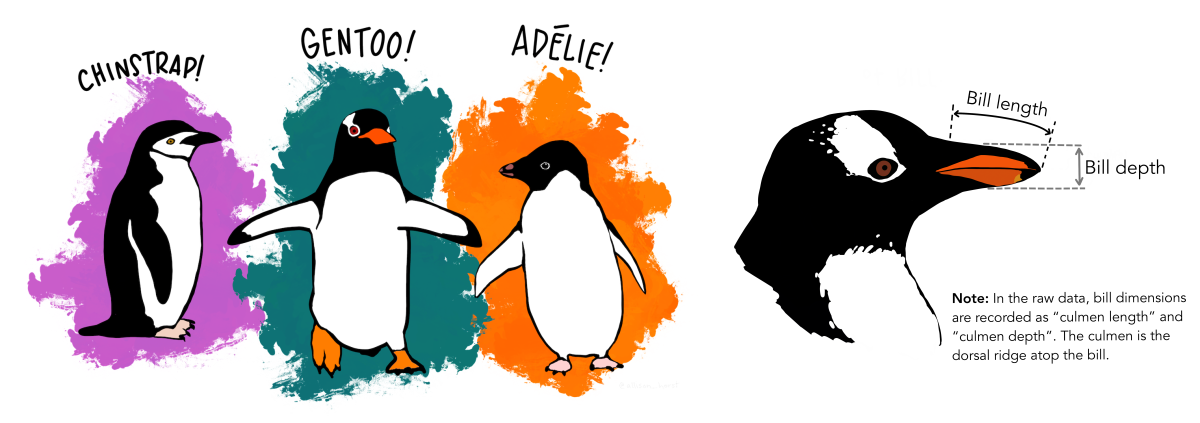

## Task 2.1 Load and Visualize Penguins Dataset

Execute the following code to load the penguin dataset.
Get familiar with the different columns (a visual explanation of "bill length" and "bill depth" can be seen above). Have a look at the pairwise data distributions. How distinct are the clusters for penguin species? 

In [10]:
# original example: https://umap-learn.readthedocs.io/en/latest/basic_usage.html

import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


# penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")

# penguins.to_csv("penguins.csv", index=False)
penguins = pd.read_csv("penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


Before visualizing the dataset, we get rid of columns that contain any NaN values first.

In [11]:
penguins = penguins.dropna()
penguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

We have a multidimensional dataset (8 different features: species, island, etc.). For an initial visualization we display the pairwise distributions between all features. We leave out the year column, as it does describe the measurement time but no characteristic of the penguins itself.

What we can observe is that non of the pairwise comparisons clearly form clusters that separate the 3 different penguin species.

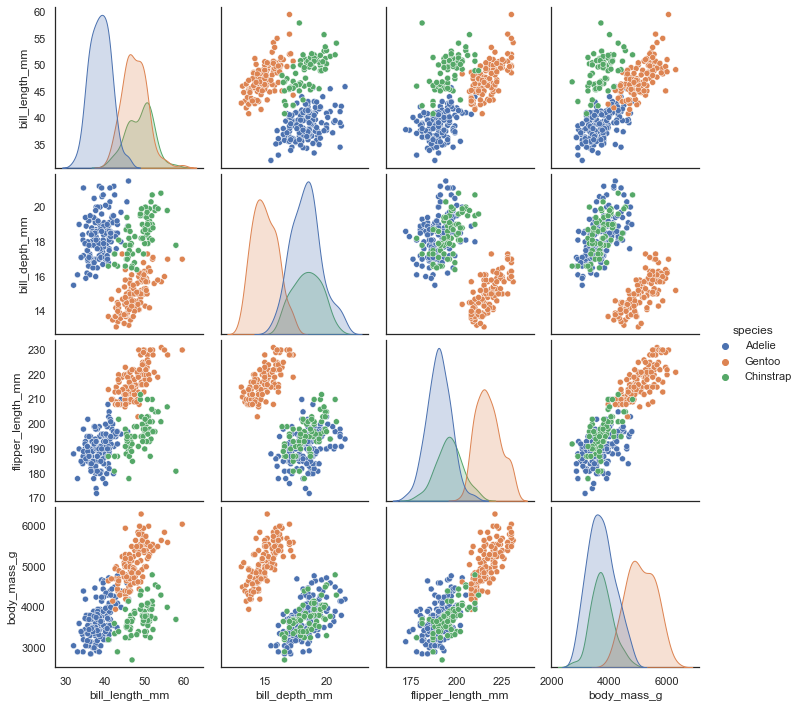

In [12]:
sns.pairplot(penguins.drop("year", axis=1), hue='species');

## Task 2.1 Testing Different Clustering Methods

Next we want to find out how well different clustering methods work for separating the species from one another. Since our data is multidimensional we can select two features. The cluster methods which will be used are kmeans, spectral and birch.  

In [13]:
def gt_label_indices(df,f):
    label_list = df[f].to_list()
    unique_list = list(np.unique(label_list))
    
    index_list = []
    for l in label_list:
        index_list.append(unique_list.index(l))
        
    return index_list
        
def kmeans(df,n_clusters,f1,f2):
    labels = cluster.KMeans(n_clusters=n_clusters).fit_predict(df[[f1,f2]])
    return labels

def spectral(df, n_clusters,f1,f2):

    labels = cluster.SpectralClustering(
        n_clusters=n_clusters,
        eigen_solver="arpack",
        affinity="nearest_neighbors",
        random_state=0).fit_predict(df[[f1, f2]])
    
    return labels  

def birch(df, n_clusters,f1,f2):
#     df = df.sample(frac=0.5)    answer = len(df['color'].unique())
    labels = cluster.Birch(branching_factor=200, threshold=1, n_clusters=n_clusters) \
                    .fit_predict(df[[f1, f2]])
    return labels

In [14]:
from sklearn import cluster
f1 = "flipper_length_mm"
f2 = "bill_length_mm"

gt_labels       = gt_label_indices(penguins,"species")
kmeans_labels   = kmeans(penguins,3,f1,f2)
spectral_labels = spectral(penguins,3,f1,f2)
birch_labels    = birch(penguins,3,f1,f2)

Text(0.5, 1.0, 'BIRCH')

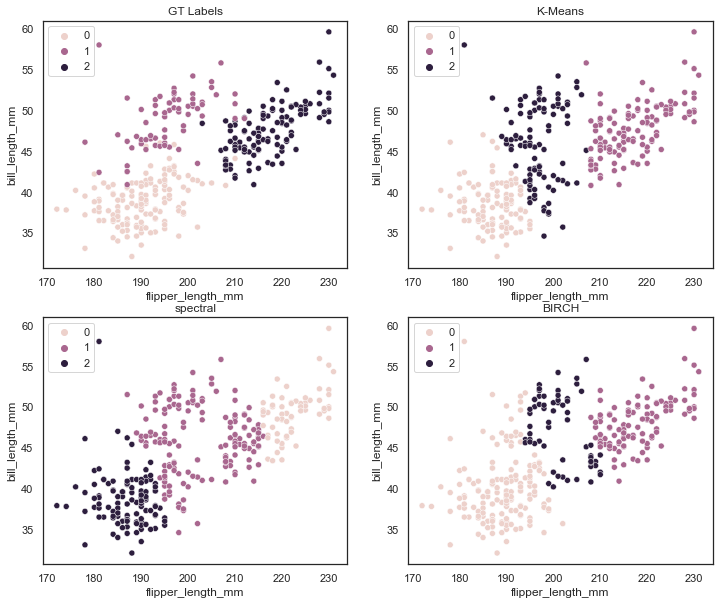

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=penguins, x=f1, y=f2, hue = gt_labels,ax=axes[0,0])
axes[0,0].set_title("GT Labels")

sns.scatterplot(data=penguins, x=f1, y=f2, hue = kmeans_labels,ax=axes[0,1])
axes[0,1].set_title("K-Means")

sns.scatterplot(data=penguins, x=f1, y=f2, hue = spectral_labels,ax=axes[1,0])
axes[1,0].set_title("spectral")

sns.scatterplot(data=penguins, x=f1, y=f2, hue = birch_labels,ax=axes[1,1])
axes[1,1].set_title("BIRCH")

## Task 2.3 Comparing Dimensionality Reduction Methods

As we have seen in the latter task, separating the clusters has so far not worked that well. But currently we are using only two features instead of all the features that would be available. In the next step we want to use dimensionality reduction methods to find the most dominant characteristics within the multidimensional dataset and map it to the 2D space.
The hope is that this will help us separate the species clusters. We are going to apply 3 different methods: PCA, t-sne and UMAP.

In [16]:
# first we scale the data to normalize the range of values

penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

(333,)


[Text(0.5, 1.0, 'PCA')]

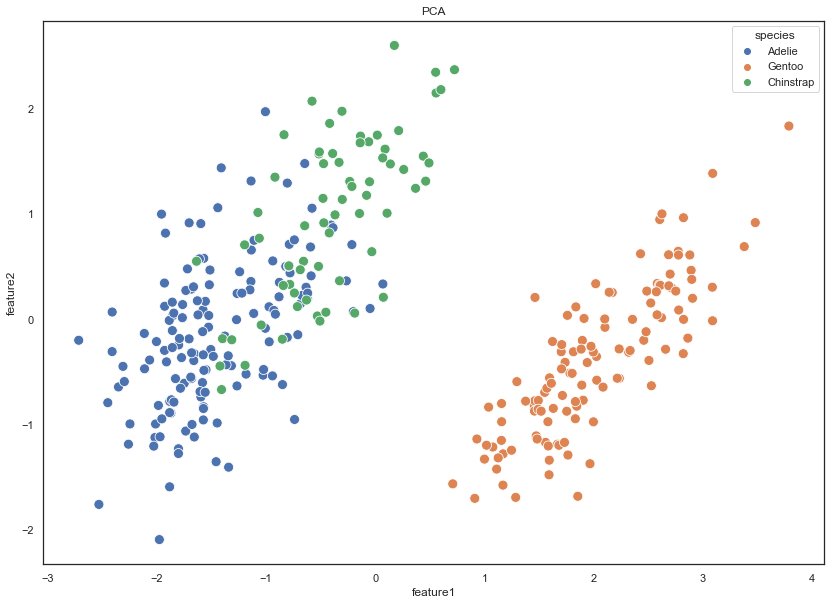

In [17]:
from sklearn.decomposition import PCA
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

X_reduced = PCA(n_components=2).fit_transform(scaled_penguin_data)


print(X_reduced[:, 0].shape)


pca_df = pd.DataFrame(data={"species":penguins["species"],
                       "feature1":X_reduced[:, 0],
                       "feature2":X_reduced[:, 1]})

sns.scatterplot(data=pca_df, x="feature1", y="feature2", hue = "species", s=100).set(title='PCA')

# plt.scatter(
#     X_reduced[:, 0],
#     X_reduced[:, 1],
#     c=[sns.color_palette()[x] for x in penguins.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})],
#     s= 100,
#  )
# plt.gca().set_aspect('equal', 'datalim')
# plt.title('PCA projection of the Penguin dataset', fontsize=24)

[Text(0.5, 1.0, 'TSNE')]

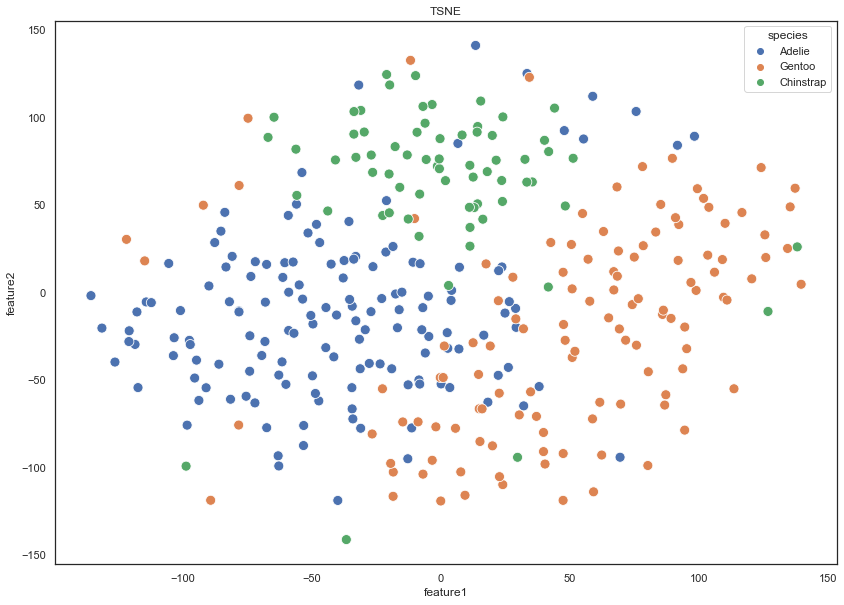

In [18]:
from sklearn import manifold


tsne = manifold.TSNE(n_components=3, init='pca', random_state=2)
X_tsne = tsne.fit_transform(scaled_penguin_data)

tsne_df = pd.DataFrame(data={"species":penguins["species"],
                       "feature1":X_tsne[:, 0],
                       "feature2":X_tsne[:, 1]})

sns.scatterplot(data=tsne_df, x="feature1", y="feature2", hue = "species", s=100).set(title='TSNE')


[Text(0.5, 1.0, 'UMAP')]

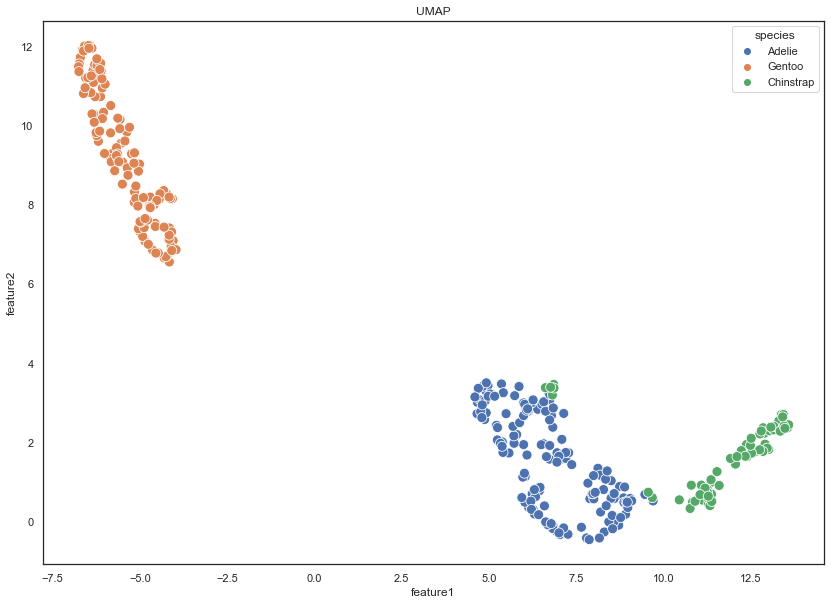

In [19]:
import umap

reducer = umap.UMAP()

embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

umap_df = pd.DataFrame(data={"species":penguins["species"],
                       "feature1":embedding[:, 0],
                       "feature2":embedding[:, 1]})

sns.scatterplot(data=umap_df, x="feature1", y="feature2", hue = "species", s=100).set(title='UMAP')

## Task 2.4 Clustering the Mappings of Dimensionality Reduction

For the penguin data, we find that the UMAP method works really well for creating clusters that reflect the penguin species.
Lets see if we can now apply the clustering methods to arrive at similar clusters in an unsupervised way. 

In [20]:
f1 = "feature1"
f2 = "feature2"


gt_labels       = gt_label_indices(umap_df,"species")
kmeans_labels   = kmeans(umap_df,3,f1,f2)
spectral_labels = spectral(umap_df,3,f1,f2)
birch_labels    = birch(umap_df,3,f1,f2)

C:\Users\estumpe\Anaconda3\envs\imrea_tf\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 1.0, 'BIRCH')

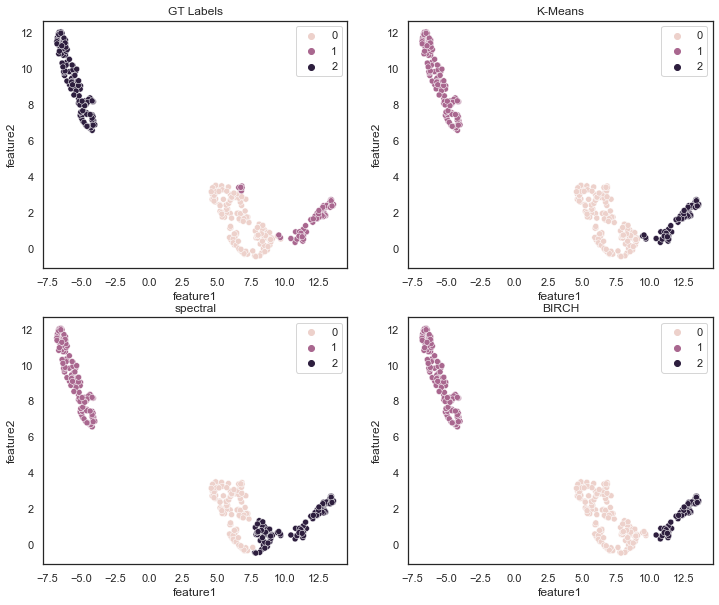

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=umap_df, x=f1, y=f2, hue = gt_labels,ax=axes[0,0])
axes[0,0].set_title("GT Labels")

sns.scatterplot(data=umap_df, x=f1, y=f2, hue = kmeans_labels,ax=axes[0,1])
axes[0,1].set_title("K-Means")

sns.scatterplot(data=umap_df, x=f1, y=f2, hue = spectral_labels,ax=axes[1,0])
axes[1,0].set_title("spectral")

sns.scatterplot(data=umap_df, x=f1, y=f2, hue = birch_labels,ax=axes[1,1])
axes[1,1].set_title("BIRCH")

Finally we want to get an overview of what datapoints where attributed to which cluster. We therefore transfer our found labels to a copy of the original dataframe. This lets us display the rows corresponding to each cluster.

In [22]:
penguins_clusters = penguins.copy()
penguins_clusters["cluster_index"] = birch_labels

cluster = 0

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(penguins_clusters.loc[penguins_clusters["cluster_index"]==cluster])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,cluster_index
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007,0
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007,0
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007,0
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007,0


## Task 3: Analyze your own dataset

In Task 2 you've seen how dimensionality reduction and clustering methods can be used in tandem to find different classes in an unsupervised way. Now it is your turn to apply the learned methods to a dataset of your choice.
You can find many diverse datasets on the website kaggle.com

Examples are:
billionares statistics dataset: https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset
fastfood nutrition dataset: https://www.kaggle.com/datasets/ulrikthygepedersen/fastfood-nutrition
Global Surface Temperatures: https://www.kaggle.com/datasets/sujaykapadnis/global-surface-temperatures

Here are some hints for you:

1. to download a dataset you have to create an account for kaggle.com
2. you should be looking for datasets that are in table format (csv)
3. The presented methods work the easies for metric data (e.g. bill_length= 18.7mm). Choosing a dataset with many columns of categorical data (e.g. month="September") will require more preprocessing from your side.
4. As soon as you have loaded the csv file you can declare one column as the label feature (in the penguins dataset this was the species) the other columns will represent the features.
5. if your dataset contains to many problematic columns you can reduce filter the dataframe and only include columns of your choice (e.g. new_df = penguins[["species","island","bill_length_mm"]])
6. reducing the number of columns might also be advantageous for generating a useful sns.pairplot()

You don't have to strictly follow the example for penguin clustering.
The goal is instead to find interesting correlations for your chosen dataset that maybe not obvious on first glance.

TODO: Report your observations of the detected clusters and interesting correlations in the markdown cell below:

**My observations:** ....

## Below: Copy of above Penguin Code --> TODO: modify Code for your dataset

In [23]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})


# penguins = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/inst/extdata/penguins.csv")

# penguins.to_csv("penguins.csv", index=False)
penguins = pd.read_csv("penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [24]:
penguins = penguins.dropna()
penguins.species.value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

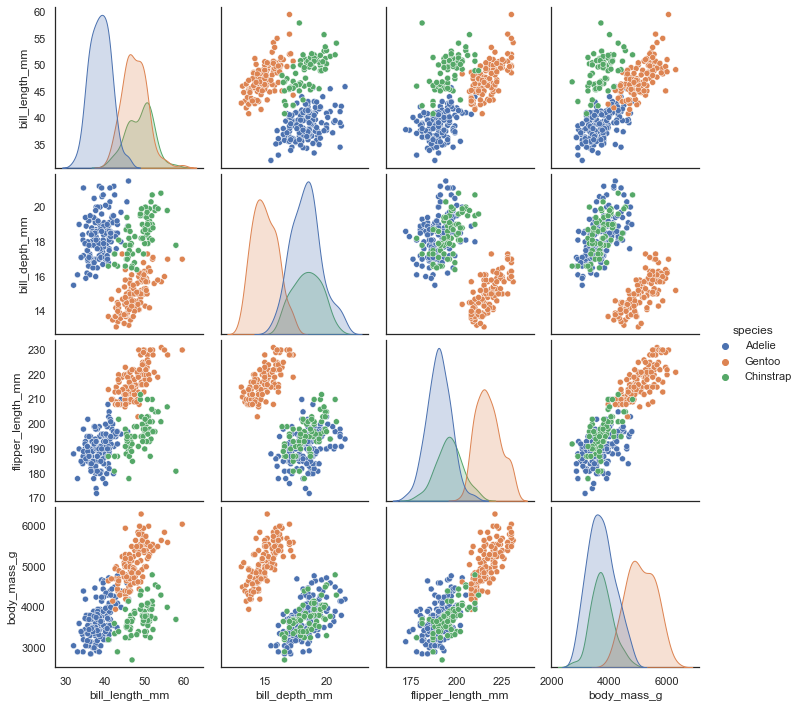

In [25]:
sns.pairplot(penguins.drop("year", axis=1), hue='species');

In [26]:
from sklearn import cluster
f1 = "flipper_length_mm"
f2 = "bill_length_mm"

gt_labels       = gt_label_indices(penguins,"species")
kmeans_labels   = kmeans(penguins,3,f1,f2)
spectral_labels = spectral(penguins,3,f1,f2)
birch_labels    = birch(penguins,3,f1,f2)

Text(0.5, 1.0, 'BIRCH')

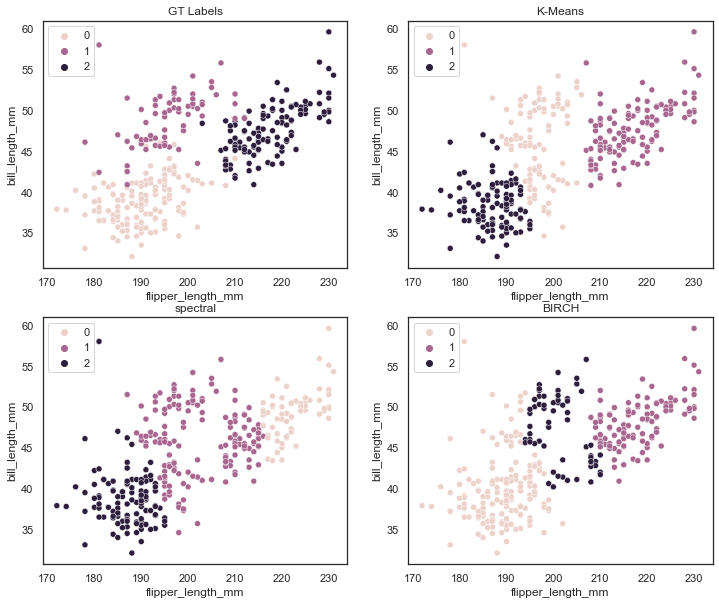

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=penguins, x=f1, y=f2, hue = gt_labels,ax=axes[0,0])
axes[0,0].set_title("GT Labels")

sns.scatterplot(data=penguins, x=f1, y=f2, hue = kmeans_labels,ax=axes[0,1])
axes[0,1].set_title("K-Means")

sns.scatterplot(data=penguins, x=f1, y=f2, hue = spectral_labels,ax=axes[1,0])
axes[1,0].set_title("spectral")

sns.scatterplot(data=penguins, x=f1, y=f2, hue = birch_labels,ax=axes[1,1])
axes[1,1].set_title("BIRCH")

In [28]:
# first we scale the data to normalize the range of values

penguin_data = penguins[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

scaled_penguin_data = StandardScaler().fit_transform(penguin_data)

(333,)


[Text(0.5, 1.0, 'PCA')]

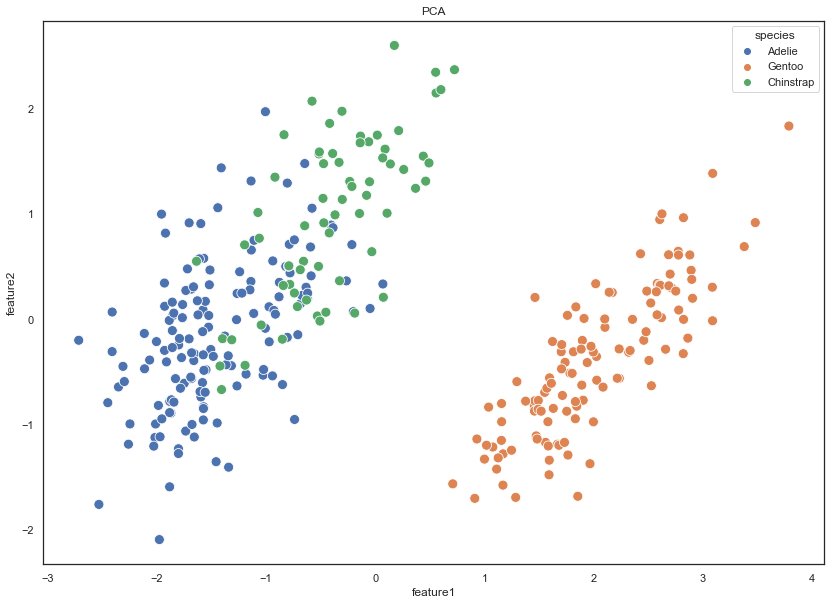

In [29]:
from sklearn.decomposition import PCA
# https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html#sphx-glr-auto-examples-datasets-plot-iris-dataset-py

X_reduced = PCA(n_components=2).fit_transform(scaled_penguin_data)


print(X_reduced[:, 0].shape)


pca_df = pd.DataFrame(data={"species":penguins["species"],
                       "feature1":X_reduced[:, 0],
                       "feature2":X_reduced[:, 1]})

sns.scatterplot(data=pca_df, x="feature1", y="feature2", hue = "species", s=100).set(title='PCA')


[Text(0.5, 1.0, 'TSNE')]

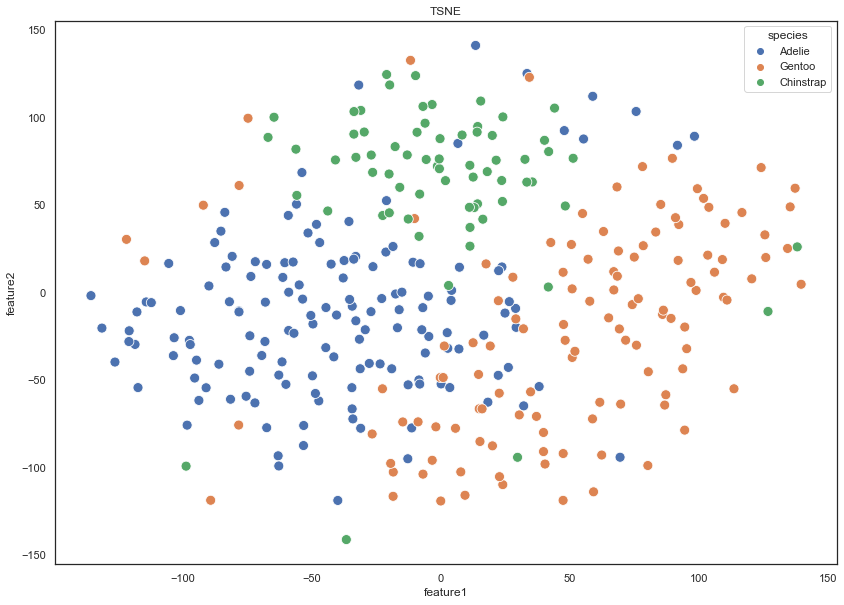

In [30]:
from sklearn import manifold


tsne = manifold.TSNE(n_components=3, init='pca', random_state=2)
X_tsne = tsne.fit_transform(scaled_penguin_data)

tsne_df = pd.DataFrame(data={"species":penguins["species"],
                       "feature1":X_tsne[:, 0],
                       "feature2":X_tsne[:, 1]})

sns.scatterplot(data=tsne_df, x="feature1", y="feature2", hue = "species", s=100).set(title='TSNE')


[Text(0.5, 1.0, 'UMAP')]

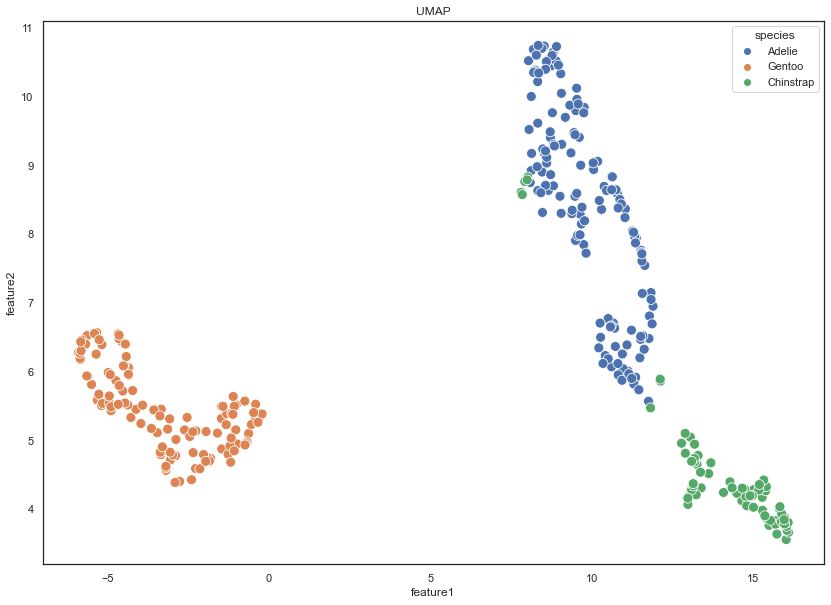

In [31]:
import umap

reducer = umap.UMAP()

embedding = reducer.fit_transform(scaled_penguin_data)
embedding.shape

umap_df = pd.DataFrame(data={"species":penguins["species"],
                       "feature1":embedding[:, 0],
                       "feature2":embedding[:, 1]})

sns.scatterplot(data=umap_df, x="feature1", y="feature2", hue = "species", s=100).set(title='UMAP')

In [32]:
f1 = "feature1"
f2 = "feature2"


gt_labels       = gt_label_indices(umap_df,"species")
kmeans_labels   = kmeans(umap_df,3,f1,f2)
spectral_labels = spectral(umap_df,3,f1,f2)
birch_labels    = birch(umap_df,3,f1,f2)

C:\Users\estumpe\Anaconda3\envs\imrea_tf\lib\site-packages\sklearn\manifold\_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


Text(0.5, 1.0, 'BIRCH')

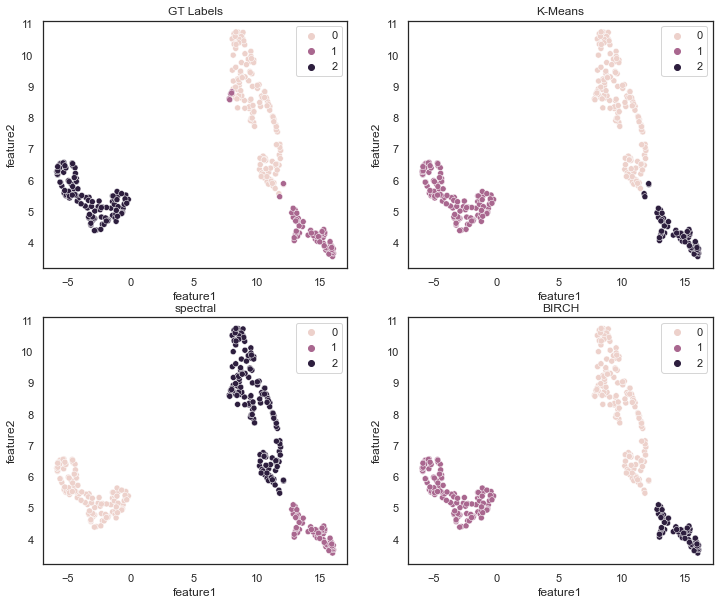

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

sns.scatterplot(data=umap_df, x=f1, y=f2, hue = gt_labels,ax=axes[0,0])
axes[0,0].set_title("GT Labels")

sns.scatterplot(data=umap_df, x=f1, y=f2, hue = kmeans_labels,ax=axes[0,1])
axes[0,1].set_title("K-Means")

sns.scatterplot(data=umap_df, x=f1, y=f2, hue = spectral_labels,ax=axes[1,0])
axes[1,0].set_title("spectral")

sns.scatterplot(data=umap_df, x=f1, y=f2, hue = birch_labels,ax=axes[1,1])
axes[1,1].set_title("BIRCH")

In [34]:
penguins_clusters = penguins.copy()
penguins_clusters["cluster_index"] = birch_labels

cluster = 0

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(penguins_clusters.loc[penguins_clusters["cluster_index"]==cluster])

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,cluster_index
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007,0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007,0
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007,0
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007,0
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female,2007,0
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male,2007,0
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male,2007,0
